# Exercise set 3

>The goal of this exercise is to perform least squares regression and calculate some metrics for evaluating the regression ($R^2$ and residuals). We will also deal with a categorical variable.

## Exercise 3.1

[Crampton](https://doi.org/10.1093/jn/33.5.491) studied the effect of vitamin C on
Guinea pigs' teeth.<a name="cite_ref-1"></a>[<sup>[†]</sup>](#cite_note-1)
The guinea pigs were given vitamin C
(either as orange juice or as ascorbic acid in water)
at three different levels (0.5, 1, and 2 mg/day) and the
length of their odontoblasts (cells that are important for tooth development) were measured after six weeks.
The file [Data/guinea.csv](Data/guinea.csv) contains the measured lengths, delivery method, and
dosage (see the description in Table 1).


| Column     | Description                                              |
|:-----------|:---------------------------------------------------------|
| length     | Measured length of odontoblasts  (unit not given). |
| delivery   | How the vitamin C was administered: either as ascorbic acid in water (“W”) or as orange juice (“O”).            |
| dose       | Dosage of vitamin C (mg/day).                            |
||**Table 1:** *Data columns present in the file [guinea.csv](Data/guinea.csv)*|


<a name="cite_note-1"></a>1. [^](#cite_ref-1) The Canadian Government had difficulty providing natural sources of vitamin C to its armed forces during world war II. Different foods were tested for their potency, but the different chemical
procedures used at the time frequently gave inconsistent results. This study was carried out to establish a vitamin C bioassay that the chemical procedures could be checked against.

### 3.1(a)

Plot the length as a function of the dose and fit a straight line (giving the length as a function of the dose)
using least squares. Add the
straight line to the plot, calculate $R^2$ and add this as well to a suitable place in your figure. Does the
length increase or decrease with the dosage?

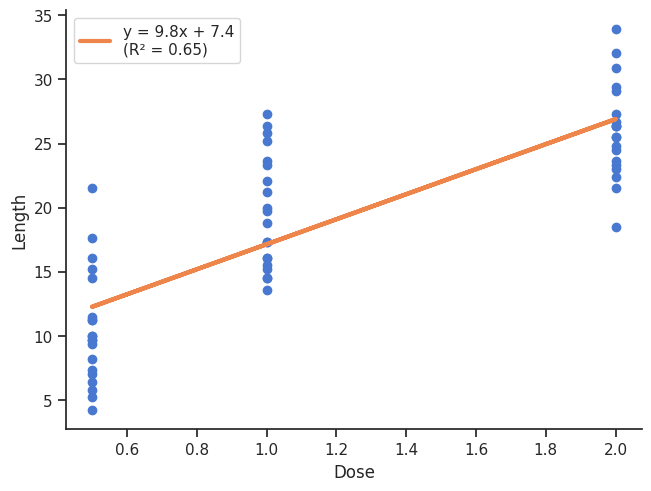

In [1]:
# First we do some imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Styling of plots
from sklearn.metrics import r2_score

sns.set_theme(style="ticks", context="notebook", palette="muted")

# Load the data
data = pd.read_csv("Data/guinea.csv")
data.head()


x = data["dose"]
y = data["length"]


model = np.polyfit(x, y, deg=1)
y_hat = np.polyval(model, x)  # Calculate y using the striaght line

r2 = r2_score(y, y_hat)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y, ls="None", marker="o")
ax.plot(x, y_hat, lw=3, label=f"y = {model[0]:.2g}x + {model[1]:.2g}\n(R² = {r2:.2f})")
ax.set(xlabel="Dose", ylabel="Length")
ax.legend()
sns.despine(fig=fig)

### Answer to question 3.1(a):
From the figure above: The length increases with the dose (this can also be seen from
the equation we determined).

### 3.1(b)
Is the measured length longer when the guinea pigs are given orange juice?
Investigate this by comparing two least squares models: 

- (i) One for the length as a function of the dose for delivery = W,
- (ii) and one for the length as a function of the dose for delivery = O.

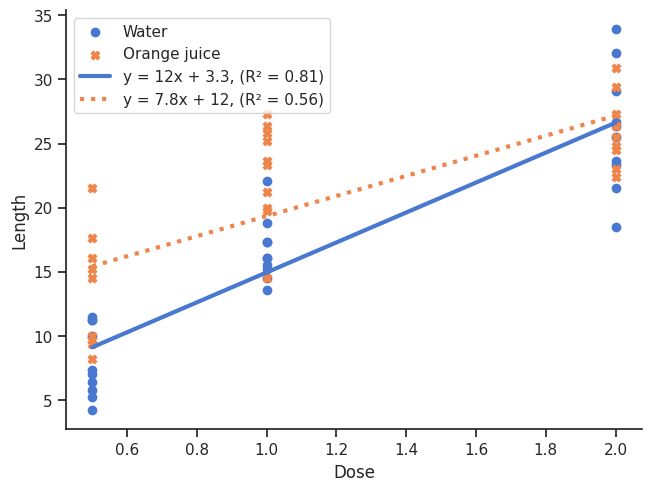

In [2]:
x = data["dose"]
y = data["length"]

# Model i:
x_water = x[data["delivery"]=="W"]
y_water = y[data["delivery"]=="W"]
model_water = np.polyfit(x_water, y_water, deg=1)
y_hat_water = np.polyval(model_water, x_water)
r2_water = r2_score(y_water, y_hat_water)

# Model ii:
x_oj = x[data["delivery"]=="O"]
y_oj = y[data["delivery"]=="O"]
model_oj = np.polyfit(x_oj, y_oj, deg=1)
y_hat_oj = np.polyval(model_oj, x_oj)
r2_oj = r2_score(y_oj, y_hat_oj)

# Plotting them together:
fig, ax = plt.subplots(constrained_layout=True)
scat1 = ax.scatter(x_water, y_water, label="Water")
scat2 = ax.scatter(x_oj, y_oj, label="Orange juice", marker="X")

ax.plot(x_water, y_hat_water, color=scat1.get_facecolor(), lw=3,
        label=f"y = {model_water[0]:.2g}x + {model_water[1]:.2g}, (R² = {r2_water:.2f})")
ax.plot(x_oj, y_hat_oj, color=scat2.get_facecolor(), lw=3, ls=":",
        label=f"y = {model_oj[0]:.2g}x + {model_oj[1]:.2g}, (R² = {r2_oj:.2f})")
ax.set(xlabel="Dose", ylabel="Length")
ax.legend()
sns.despine(fig=fig)

### Answer to question 3.1(b):
Orange juice seems to have a positive influence on the length for smaller doses. For the largest dose,
the delivery does not seem to be important.

### 3.1(c)
Investigate the previous point again by including the delivery as a variable in a model.
First, you will have to convert the delivery variable to numerical variables;
see the [appendix](#Appendix:-Categorical-variables) for a short explanation.
After you have done that, create a new least squares model on the form,

\begin{equation}
y = b_0 + b_1 x_1 + b_2 x_2 + b_{12} x_1 x_2,
\end{equation}

where $x_1$ is the dose, $x_2$ the variable representing the delivery, and $b_i$ are the
coefficients. Compare this with the models in point [3.1(b)](#3.1(b))

In [3]:
# Create new variables with dummies:
data2 = pd.get_dummies(data, columns=["delivery"])
data2.head()

,length,dose,delivery_O,delivery_W
0,4.2,0.5,0,1
1,11.5,0.5,0,1
2,7.3,0.5,0,1
3,5.8,0.5,0,1
4,6.4,0.5,0,1


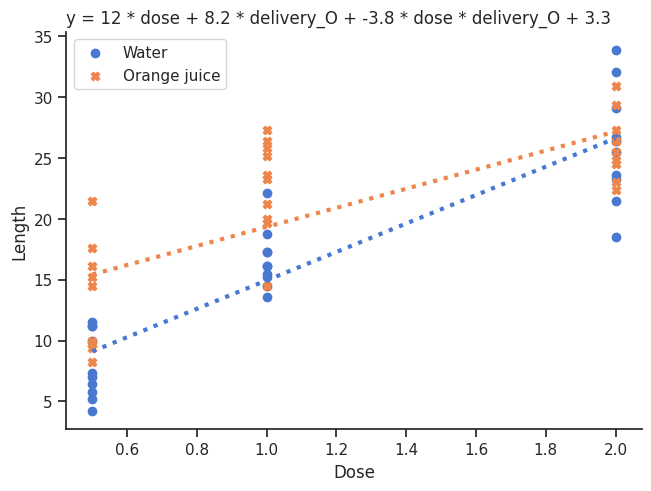

In [4]:
# We see from the table above that we got two new variables. But they are
# not independent (if we know that the guinea pigs were given orange juice, then we
# of course also know that they were not given the other delivery option.) So in a model,
# we only need one of these - I will pick the delivery_O.

# Let's make the model:
x1 = data2["dose"].to_numpy()
x2 = data2["delivery_O"].to_numpy()
# We stack the columns of the variables to make the X-matrix:
# (Note, we do not need the column of ones here, that will handeled elsewhere)
X = np.column_stack((x1, x2, x1*x2))
y = data2["length"].to_numpy()

# Use sklearn this time to make the model:

from sklearn.linear_model import LinearRegression

model_c = LinearRegression(fit_intercept=True)
model_c.fit(X, y)
y_hat_c = model_c.predict(X)
r2_c = r2_score(y, y_hat_c)

# Make a plot to show the model:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_title(
    f"y = {model_c.coef_[0]:.2g} * dose + {model_c.coef_[1]:.2g} * delivery_O + {model_c.coef_[2]:.2g} * dose * delivery_O + {model_c.intercept_:.2g}",
    loc="left"
)
scat1 = ax.scatter(x_water, y_water, label="Water")
scat2 = ax.scatter(x_oj, y_oj, label="Orange juice", marker="X")

# Evaluate the model at two points to get the straight line for plotting.
# First for x_2 = 0:
X_test = np.array([
    [0.5, 0.0, 0.5*0.0],
    [2.0, 0.0, 2.0*0.0]
])
ax.plot(X_test[:, 0], model_c.predict(X_test), color=scat1.get_facecolor(), lw=3, ls=":")
# Then for x_2 = 1:
X_test = np.array([
    [0.5, 1.0, 0.5*1.0],
    [2.0, 1.0, 2.0*1.0]
])
ax.plot(X_test[:, 0], model_c.predict(X_test), color=scat2.get_facecolor(), lw=3, ls=":")
ax.set(xlabel="Dose", ylabel="Length")
ax.legend()
sns.despine(fig=fig)

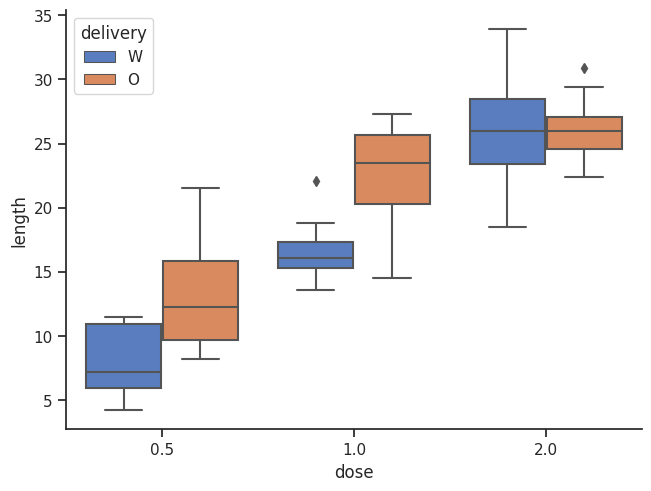

In [5]:
# Option 3, we can also get much of the same information as in the linear
# models by making a box plot. Here is one:
fig, ax = plt.subplots(constrained_layout=True)
sns.boxplot(data, ax=ax, y="length", hue="delivery", x="dose")
sns.despine(fig=fig)

### Answer to question 3.1(c):
The new model is similar to the two previous models: setting $x_0 = 1$ or $x_2 = 0$ reproduces the behavior
of the models in [3.1(b)](#3.1(b)).

## Exercise 3.2

Assume that we have recorded data as shown in Fig. 1.

<figure>
<img src="Figures/Fig_3_1.png" width="50%">
    <figcaption> <p style='text-align: center;'><b>Figure 1: </b>Points for Exercise 3.2.</p> </figcaption>
</figure>

To model this data (i.e. $y$ as a function of $x$), we suggest a third-order polynomial in $x$:

\begin{equation}
y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 .
\end{equation}

Explain how you can formulate this on a form suitable for least-squares regression,
$\mathbf{y} = \mathbf{X} \mathbf{b}$:

- (a) What do the vectors $\mathbf{y}$ and $\mathbf{b}$ contain?
- (b) What does the matrix $\mathbf{X}$ contain?

### Answer to question 3.2:
First, we rewrite the given model as a linear model by introducing
the variables $x_1 = x$, $x_2 = x^2$, and $x_3 = x^3$:

\begin{equation*}
\hat{y} = b_0 + b_1 x + b_2 x^2 + b_3 x^3 = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 .
\end{equation*}

We then let $y_{i}$ be the result of
measurement no. $i$ and
$x_{ij}$ the value of variable $j$ in the same measurement. Our model for this particular
point is then:

\begin{equation*}
y_i = b_0 + b_1 x_{i1} + b_2 x_{i2} + b_3 x_{i3} .
\end{equation*}

Put in a matrix form (assuming we have $n$ measurements), we get,

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
= \begin{bmatrix}
1 & x_{11} & x_{12} & x_{13}\\
1 & x_{21} & x_{22} & x_{23}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & x_{n3}
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
b_3 
\end{bmatrix} .
$$

Here, we can also write the $\mathbf{X}$ matrix using the original
variables,

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13}\\
1 & x_{21} & x_{22} & x_{23}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & x_{n3}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} & x_{1}^2 & x_{1}^3\\
1 & x_{2} & x_{2}^2 & x_{2}^3\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{n} & x_{n}^2 & x_{n}^3
\end{bmatrix}
.
$$

Thus we have the following:

- (a) $\mathbf{y}$ contains the measured $y_i$ values and $\mathbf{b}$ contains the parameters $b_0$, $b_1$, $b_2$, $b_3$.
- (b) $\mathbf{X}$ contains the variables as columns and a column of $1$'s
  to account for the constant term.

## Exercise 3.3

The temperature (°C) is measured continuously over time at a high altitude
in the atmosphere using a
weather balloon. Every hour a measurement is made and sent to an onboard computer.
The measurements are 
shown in Fig. 2 and can be found in [the data file](Data/temperature.txt) (located at 'Data/temperature.txt').

<figure>
<img src="Figures/Fig_3_2.png" width="50%">
<figcaption><p style='text-align: center;'><b>Fig. 2:</b> Measured temperature as a function of time.</p></figcaption> 
</figure>

### 3.3(a)
Create a Python script that performs polynomial fitting to the data using a first-, second-,
third-, fourth-, and fifth-order polynomial model. Plot the fitted curves for the five models
together with the raw data.

In [6]:
# First we do some imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Styling of plots

sns.set_theme(style="ticks", context="notebook", palette="muted")

# Load the data
data = pd.read_csv("Data/temperature.txt", delim_whitespace=True)
data.head()

,hour,yobs
0,1,31.312231
1,2,25.648250
2,3,18.575565
3,4,27.077625
4,5,14.760071


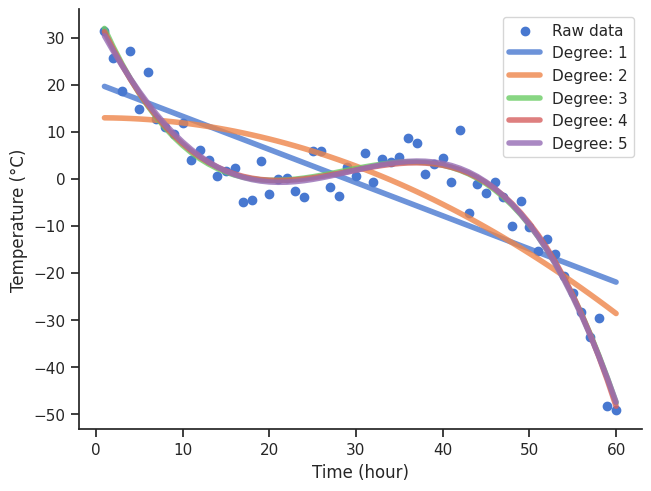

In [7]:
# Select the x and y values
xdata = data["hour"]
ydata = data["yobs"]

# Plot raw data:
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(xdata, ydata, label="Raw data")
ax.set(xlabel="Time (hour)", ylabel="Temperature (°C)")

# Now do the fitting:
degrees = [1, 2, 3, 4, 5]
fits = []  # List to append the fits into
for degree in degrees:
    fit = np.polyfit(xdata, ydata, degree)
    fits.append(fit)
    y_hat = np.polyval(fit, xdata)  # Evalutate the polynomial
    ax.plot(xdata, y_hat, label=f"Degree: {degree}", lw=4, alpha=0.8)
ax.legend()
sns.despine(fig=fig)

### 3.3(b)
Plot the residual curves for the five models and determine,
from a visual inspection, the best polynomial order to use for modeling the
temperature as a function of time.

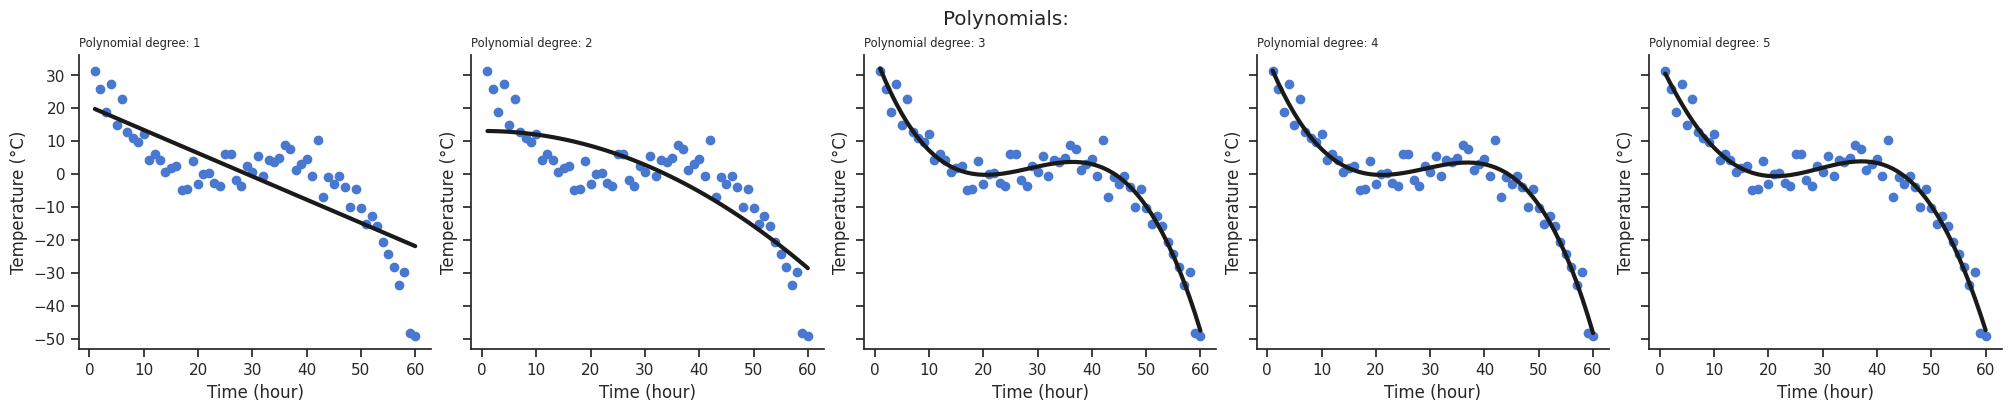

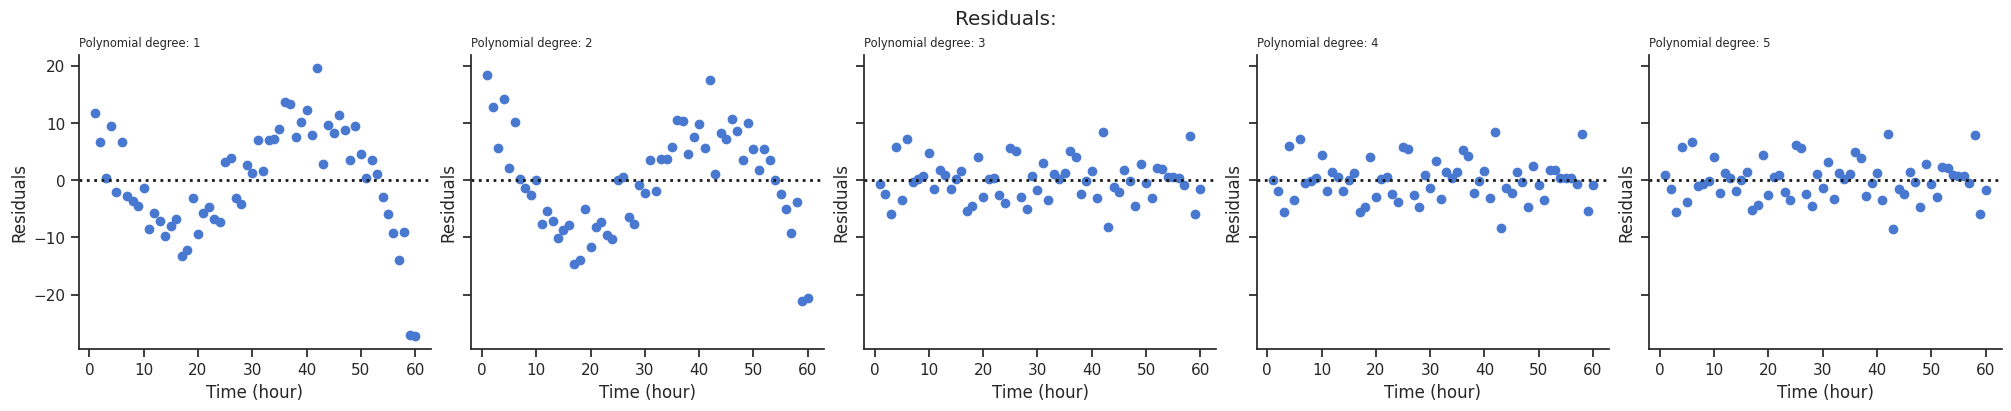

In [8]:
# Let us make two figures:
# Figure 1: showing the lines estimated by the model

fig1, axes1 = plt.subplots(
    nrows=1,
    ncols=5,
    constrained_layout=True,
    sharex=True,
    sharey=True,
    figsize=(20, 4),
)
fig1.suptitle("Polynomials:")

# Figure 2: Showing the residuals
fig2, axes2 = plt.subplots(
    nrows=1,
    ncols=5,
    constrained_layout=True,
    sharex=True,
    sharey=True,
    figsize=(20, 4),
)
fig2.suptitle("Residuals:")


for i, (degree, fit) in enumerate(zip(degrees, fits)):
    y_hat = np.polyval(fit, xdata)  # Make the estimated y values
    
    axes1[i].scatter(xdata, ydata)
    axes1[i].plot(xdata, y_hat, color="k", lw=3)
    axes2[i].scatter(xdata, ydata - y_hat)  # Plot the residuals
    axes2[i].axhline(0, c="k", ls=":", lw=2)  # Plot a hline at 0 as a guidance for the eye
    axes2[i].set(xlabel="Time (hour)", ylabel="Residuals")
    axes1[i].set(xlabel="Time (hour)", ylabel="Temperature (°C)")
    # Set the plot title
    axes1[i].set_title(
        f"Polynomial degree: {degree}", loc="left", fontsize="x-small"
    )
    axes2[i].set_title(
        f"Polynomial degree: {degree}", loc="left", fontsize="x-small"
    )


sns.despine(fig=fig1)
sns.despine(fig=fig2)

### Answer to question 3.3(b)
For third, fourth, and fifth order, we have unstructured residuals and the fitted lines seem to
follow the data well. Here, we go with the easiest description of our model, **degree 3**.

### 3.3(c)
Obtain the sum of squared residuals for each polynomial and plot this as a function of the
polynomial degree. Use this plot to determine (from visual inspection) the best polynomial
order for modeling the temperature as a function of time. Does this agree with your
conclusion in point [(b)](#3.3(b))?

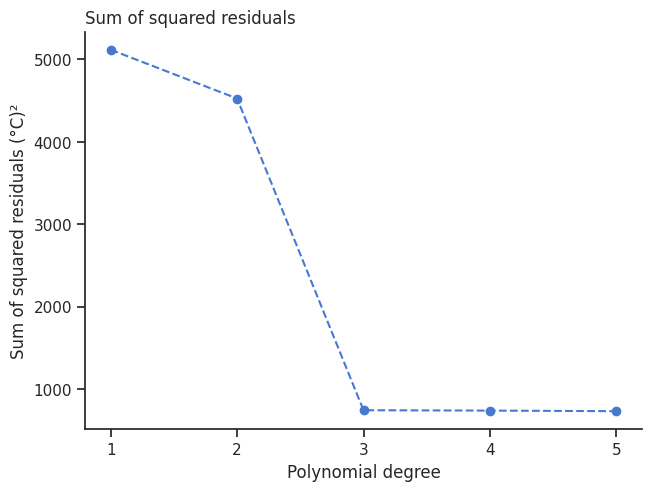

In [9]:
# First get the squared risiduals
sres = []  # List of all the squared residuals
for degree, fit in zip(degrees, fits):
    y_hat = np.polyval(fit, xdata)  # Make the estimated y values
    res = ydata - y_hat  # Calculate the residuals
    sr = sum(res**2)  # Sum the residuals squared
    sres.append(sr)  # Add it to the list
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(degrees, sres, ls="--", marker="o")
ax.set_title("Sum of squared residuals", loc="left")
ax.set_xticks(degrees)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("Sum of squared residuals (°C)²")
sns.despine(fig=fig)

### Answer to question 3.3(c)
We have a significant drop in the sum of squared residuals when going from second to third order.
After that, we do not see significant changes. This again points to a third order polynomial being
the best one here (simplest model, and making the model more complex does not improve things significantly).

## Appendix: Categorical variables
The delivery in exercise [3.1](#Exercise-3.1)
is a categorical variable (it is either W or O).
To include it in a model,
we first have to convert the categories to numerical values to do math with them.
Let us first think of
a more general case with $N$ categories.
It could be tempting to represent each category with a number, $1$, $2$, $3$, and so on, but this
is not a good idea. A numeric representation like that introduces
an artificial ordering: e.g., $5$ is a larger number than $1$, but that does not make sense for categories!

One way to fix this and include
categorical variables is
to use [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).
(And another way is [one-hot encoding](https://en.wikipedia.org/wiki/One-hot))

With dummy variables, we add more variables that can take values $0$ or $1$ for ``off''/``on''.
If we have
$N$ categories, we need $N-1$ dummy variables to represent the categories.
We can then include the "presence" of the categories without adding an order.
Since this is a standard operation, there is an automatic method to do this in
pandas: [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).